# Sea ice thickness (sithick)

## Imports & defaults

In [1]:
import libs.helpers as helpers
import libs.plot
import matplotlib
import numpy as np
import xarray
import xesmf

matplotlib.rcParams.update({ 'font.size': 18 })

import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
path_nsidc_mask = '_data/_cache/NSIDC_Regions_Masks_Ocean_nearest_s2d.nc'
nsidc_mask = xarray.open_mfdataset(paths=path_nsidc_mask, combine='by_coords').mask
nsidc_mask = nsidc_mask
base_units = 'm'

path_areacello = '_data/cmip6/UKESM1/areacello_Ofx_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc'
areacello = xarray.open_mfdataset(paths=path_areacello, combine='by_coords').areacello
areacello_w = areacello.fillna(0)

sithick_base = helpers.get_data('ssp585', 'SImon', 'sithick', 'r2i1p1f2')
sithick = sithick_base.sithick.where(sithick_base.sithick.latitude > 60).where(nsidc_mask.values > 0)

si_arr = [
    {
        'data': sithick,
        'label': 'sithick'
    }
]

si_arr_weighted_mean = []
for item in si_arr:
    si_weighted = item['data'].weighted(areacello_w)
    si_weighted_mean = si_weighted.mean(dim=si_weighted.weights.dims, skipna=True)

    si_arr_weighted_mean.append({
        'data': si_weighted_mean,
        'label': item['label']
    })
    
colormesh_kwargs = {
    'extend': 'max',
    'levels': 21,
    'vmin': 0,
    'vmax': 3,
    'x': 'longitude', 
    'y': 'latitude'
}
monthly_title = '{m} SSP585 {label} 60-90°N ({units})'
seasonal_title = '{s} SSP585 {label} 60-90°N ({units})'
time_series_ylabel = f'sea-ice thickness ({base_units})'

## Time series

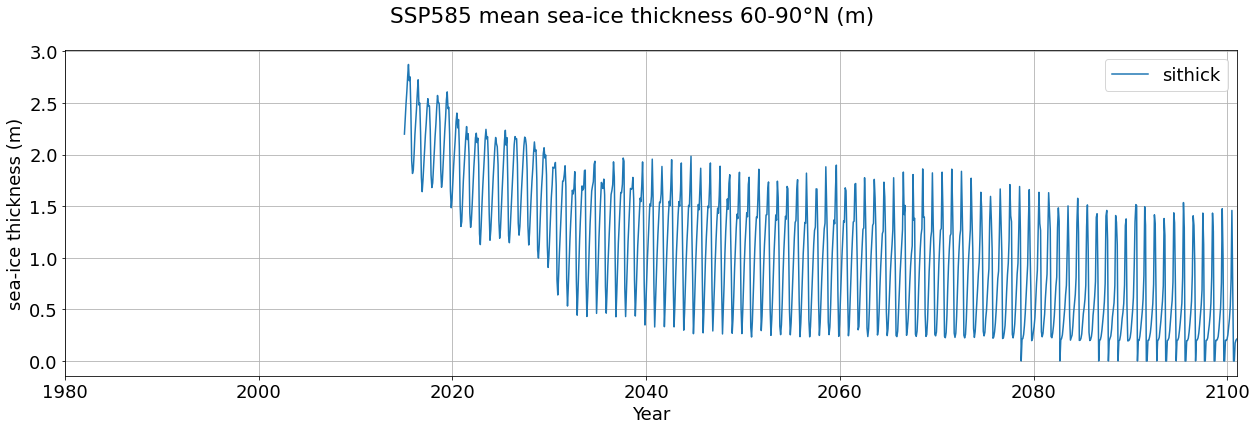

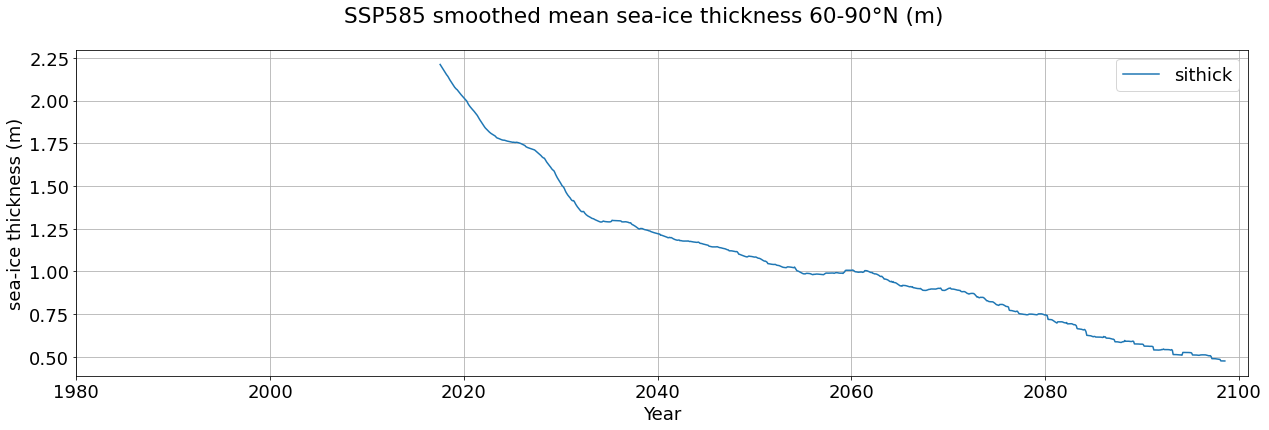

In [3]:
libs.plot.time_series(
    si_arr_weighted_mean,
    title=f'SSP585 mean sea-ice thickness 60-90°N ({base_units})',
    xattr='time',
    ylabel=time_series_ylabel,
    process=lambda x: x.fillna(0)
)

libs.plot.time_series(
    si_arr_weighted_mean,
    title=f'SSP585 smoothed mean sea-ice thickness 60-90°N ({base_units})',
    xattr='time',
    ylabel=time_series_ylabel,
    process=lambda x: helpers.smoothed_mean(x.fillna(0))
)

## Monthly variability

### Full region (time)

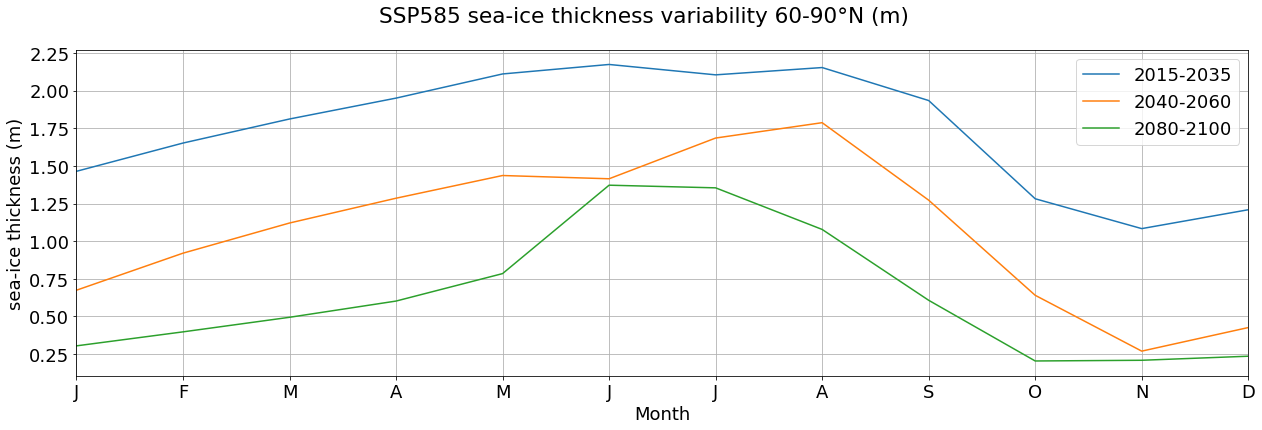

In [4]:
libs.plot.monthly_variability(
    helpers.monthly_means_time(sithick, areacello_w),
    title=f'SSP585 sea-ice thickness variability 60-90°N ({base_units})',
    ylabel=time_series_ylabel
)

### Regional sea-ice thickness (time)

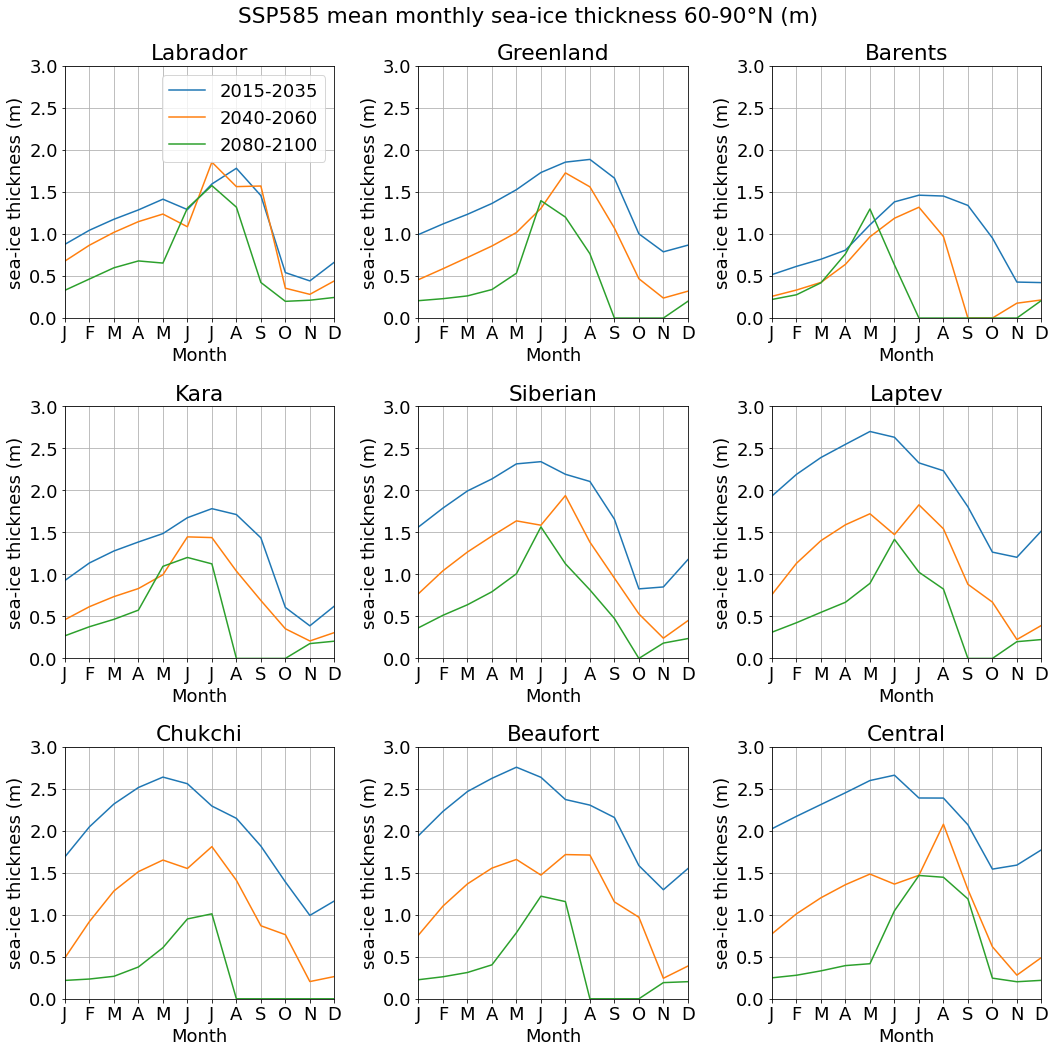

In [5]:
libs.plot.monthly_variability_regional(
    sithick, 
    title=f'SSP585 mean monthly sea-ice thickness 60-90°N ({base_units})',
    ylabel=time_series_ylabel,
    mask_type='ocean',
    process=lambda x: helpers.monthly_means_time(x, areacello_w, fillna=True),
    ylim=[0, 3]
)

### Full region (spatial)

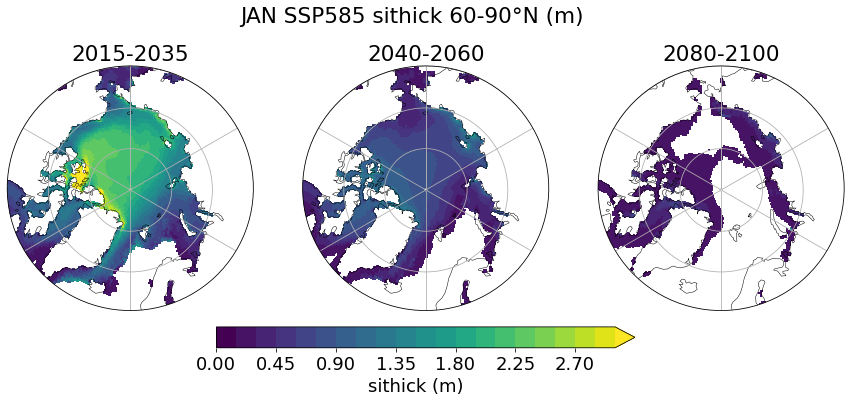

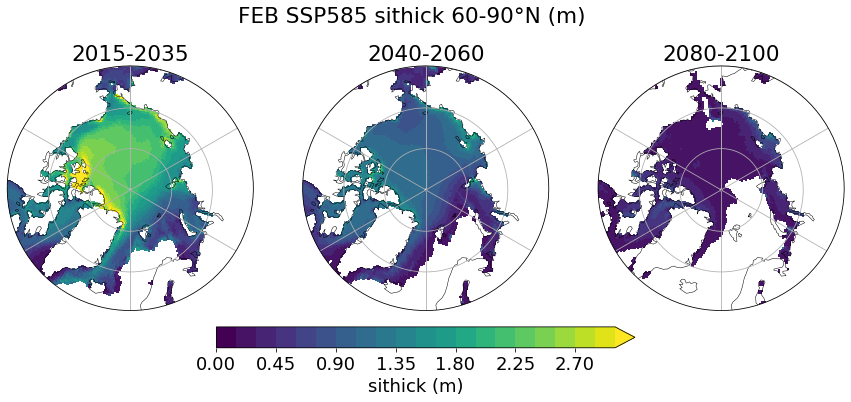

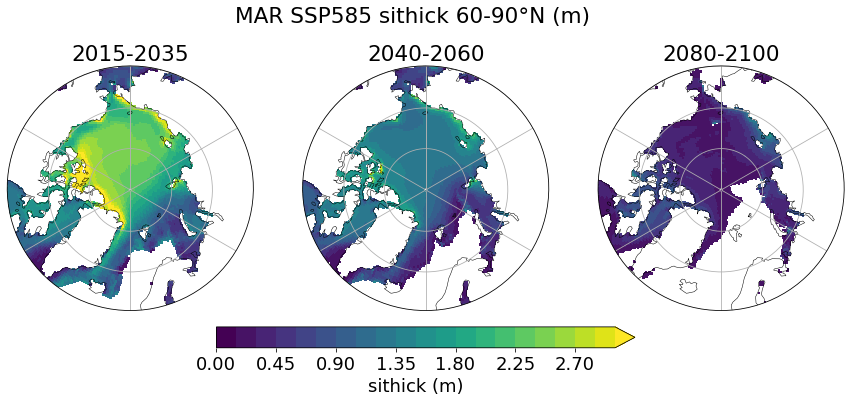

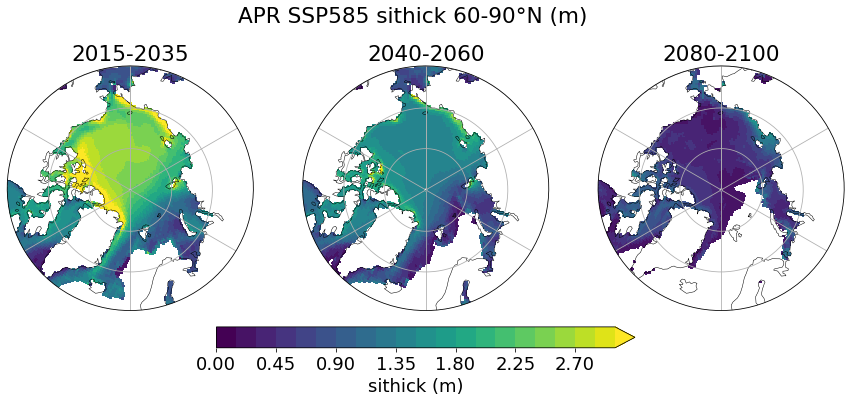

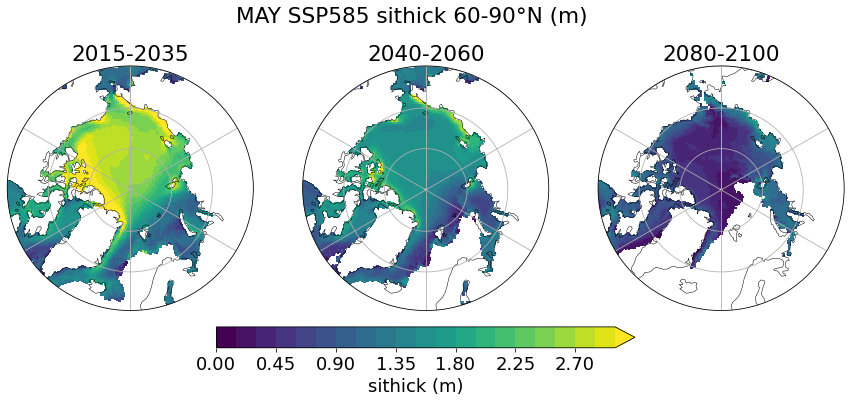

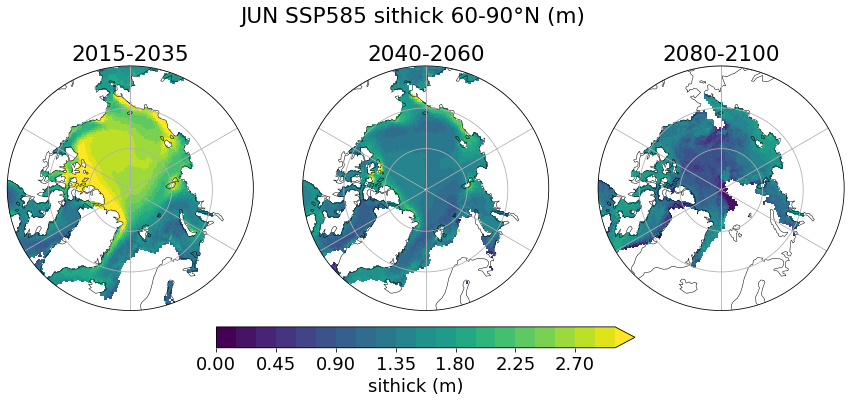

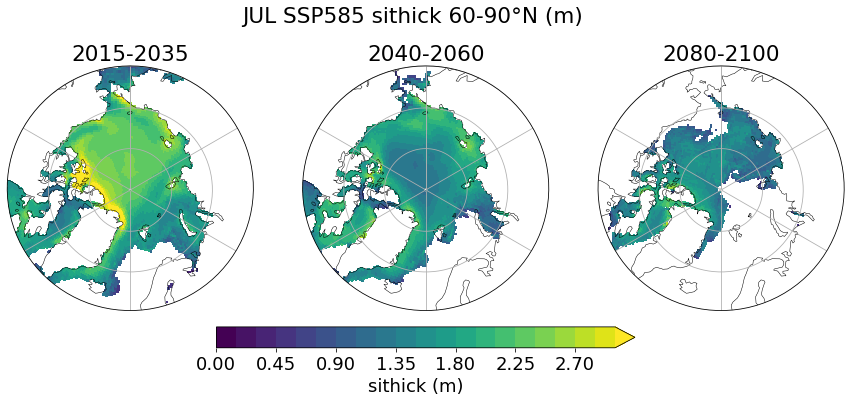

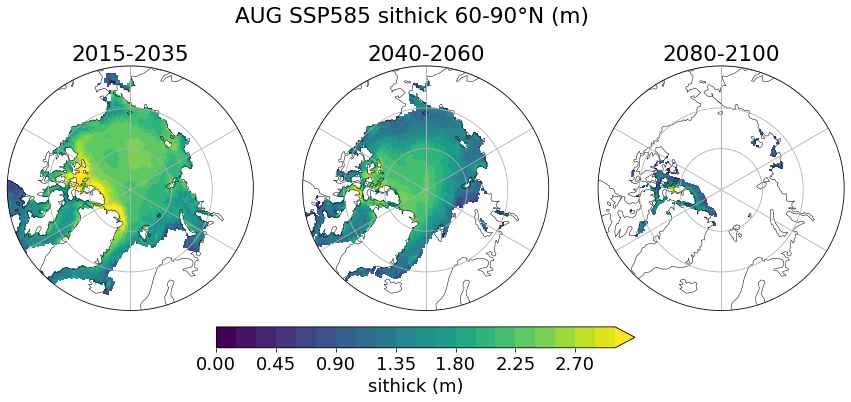

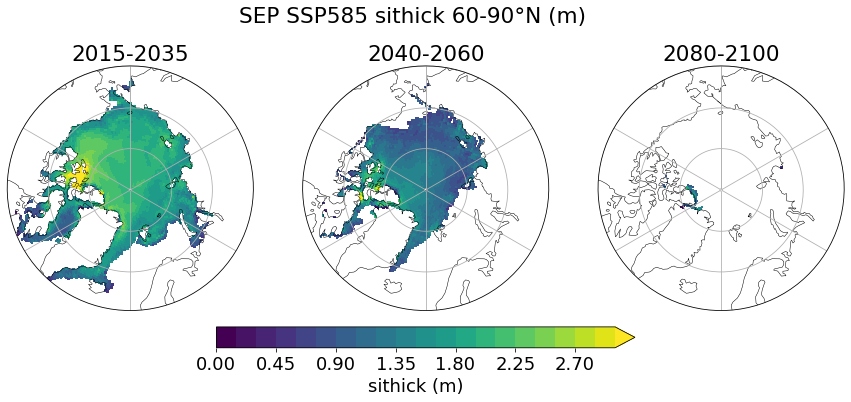

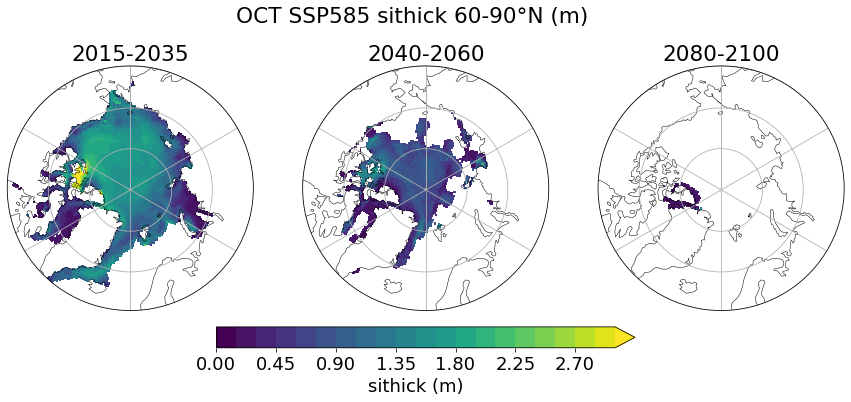

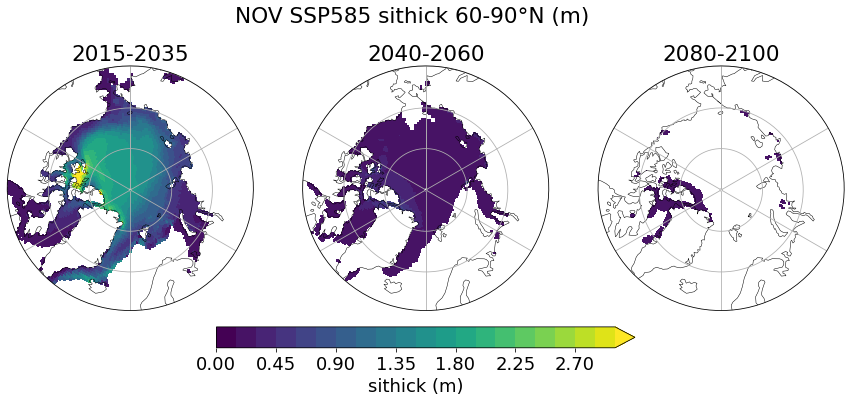

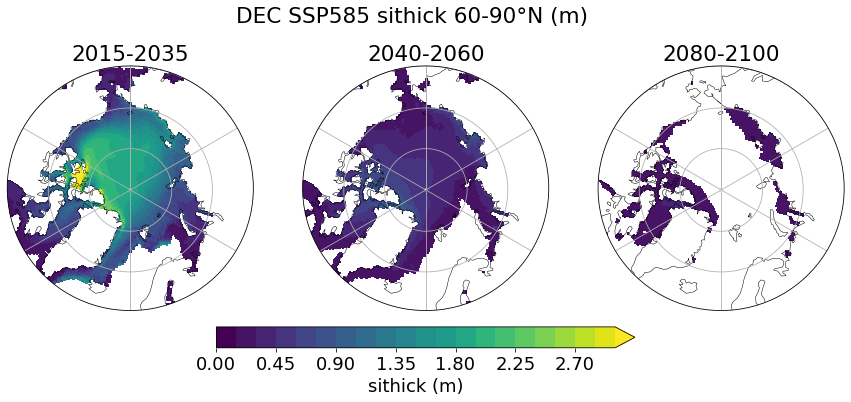

In [6]:
libs.plot.monthly_spatial(
    si_arr, 
    colormesh_kwargs=colormesh_kwargs,
    title=monthly_title,
    units=base_units
)

## Seasonal variability (spatial)

### MAM

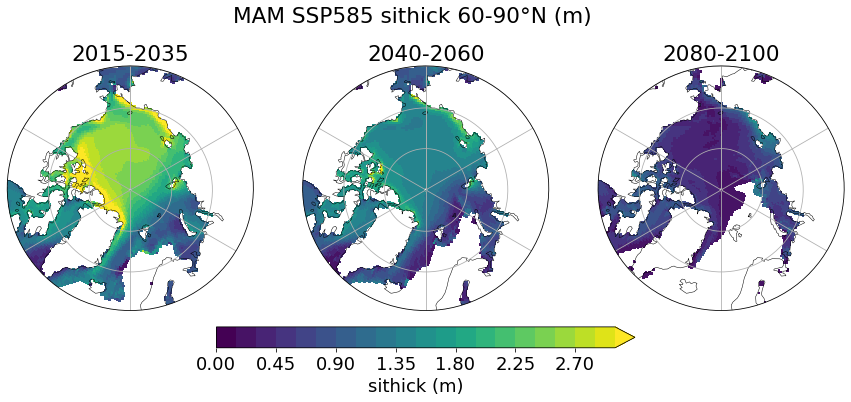

In [7]:
libs.plot.seasonal_spatial(
    si_arr, 
    colormesh_kwargs=colormesh_kwargs,
    units=base_units,
    seasons=['MAM'],
    title=seasonal_title
)

### JJA

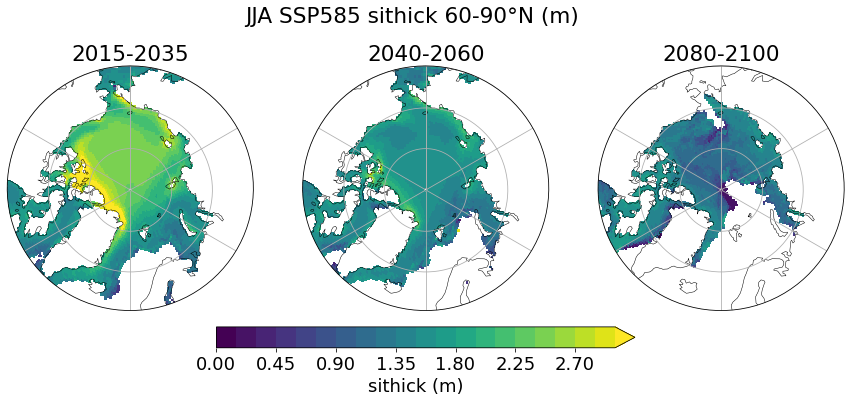

In [8]:
libs.plot.seasonal_spatial(
    si_arr, 
    colormesh_kwargs=colormesh_kwargs,
    seasons=['JJA'],
    title=seasonal_title,
    units=base_units
)

### SON

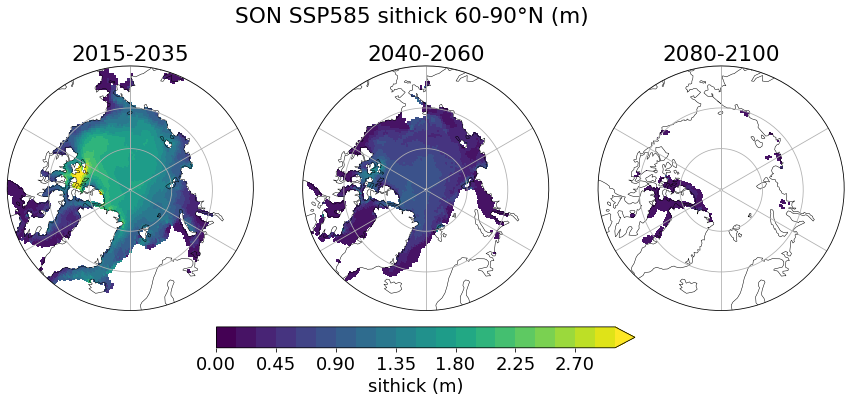

In [9]:
libs.plot.seasonal_spatial(
    si_arr, 
    colormesh_kwargs=colormesh_kwargs,
    seasons=['SON'],
    title=seasonal_title,
    units=base_units
)

### DJF

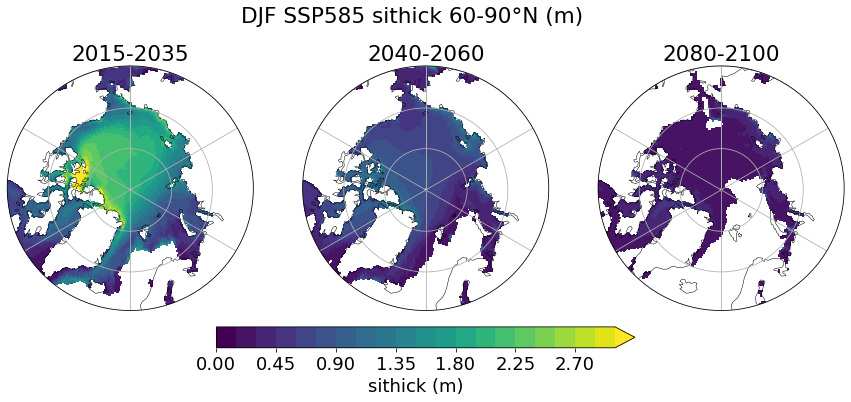

In [10]:
libs.plot.seasonal_spatial(
    si_arr, 
    colormesh_kwargs=colormesh_kwargs,
    seasons=['DJF'],
    title=seasonal_title,
    units=base_units
)